

# Project: Investigate a Dataset (No-show Apointments)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this project, datasets associated with 100k medical appointments in Brazil would be analysed. Each rows of these datasets contain descriptions about patients which include choosen days of appointment, location of hospital and Bolsa Família (Brazillian welfare program) enrollment status. The innvestigation would therefore, be guided by whether or not patients show up for their appointment.
>
> The dataset contain columns:
>
> PatientId = unique numbers identifying each patients
>
> AppointmentID = unique numbers tags for each appointment
>
> Gender = male or female identity of patients
>
> ScheduledDay = appointments schedules and time
>
> AppointmentDay = days on which appointments are scheduled to take place
>
> Age = show how old are the patients
>
> Neighbourhood = locations of hospitals hosting appointments
>
> Scholarship = enrolment status into the Brasilian welfare program (0 not enrolled, 1 enrolled)
>
> Hipertension = one of the ailments for which patients seek medical consultation, true or false
>
> Diabetes = one of the ailments for which patients seek medical consultation, true or false
>
> Alcoholism = one of the reasons for which patients seek medical consultation, true or false
>
> Handcap = one of the reasons for which patients seek medical consultation, true or false
>
> SMS_received = 1 or more messages sent to the patient
>
> No_show = it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up

In [1]:
# set up import statements for all required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

<a id='wrangling'></a>
## Data Wrangling

> In this section, the No-show appointments csv file was loaded and checked for cleanliness and consistency.Trimming and cleaning was done afterwards to make ready for analysis. Steps taken to actualise these are documented with their corresponding actions.


### General Properties

In [2]:
# Load No-show csv file and print out a few lines.
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


checking the number of rows and columns in the dataset

In [3]:
# Number of columns in the dataset
df.shape[1]

14

In [4]:
# Number of rows in the dataset
df.shape[0]

110527

checking for missing values

In [5]:
# summation of missing values per column
df.isna().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [6]:
# general details about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [7]:
# brief statistal descrption of dataset
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [8]:
# check for the summation duplicate rows 
df.duplicated().sum()

0

In [9]:
# Number of patients per gender identified in the dataset
df['Gender'].value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

In [10]:
# total number of unique hospital locations in the dataset
df.nunique().Neighbourhood

81

In [11]:
# Number of times selected unique hospital locations appeared in the dataset
df['Neighbourhood'].value_counts()

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: Neighbourhood, Length: 81, dtype: int64

In [12]:
# total number of unique appointment days in the dataset
df.nunique().AppointmentDay

27

In [13]:
# total number of appointments per days as presented by the dataset
df['AppointmentDay'].value_counts()

2016-06-06T00:00:00Z    4692
2016-05-16T00:00:00Z    4613
2016-05-09T00:00:00Z    4520
2016-05-30T00:00:00Z    4514
2016-06-08T00:00:00Z    4479
2016-05-11T00:00:00Z    4474
2016-06-01T00:00:00Z    4464
2016-06-07T00:00:00Z    4416
2016-05-12T00:00:00Z    4394
2016-05-02T00:00:00Z    4376
2016-05-18T00:00:00Z    4373
2016-05-17T00:00:00Z    4372
2016-06-02T00:00:00Z    4310
2016-05-10T00:00:00Z    4308
2016-05-31T00:00:00Z    4279
2016-05-05T00:00:00Z    4273
2016-05-19T00:00:00Z    4270
2016-05-03T00:00:00Z    4256
2016-05-04T00:00:00Z    4168
2016-06-03T00:00:00Z    4090
2016-05-24T00:00:00Z    4009
2016-05-13T00:00:00Z    3987
2016-05-25T00:00:00Z    3909
2016-05-06T00:00:00Z    3879
2016-05-20T00:00:00Z    3828
2016-04-29T00:00:00Z    3235
2016-05-14T00:00:00Z      39
Name: AppointmentDay, dtype: int64

In [14]:
# total number of unique ages of patients presented by the dataset
df.nunique().Age

104

In [15]:
# Number of patients by ages brackets presented by the dataset
df['Age'].value_counts()

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
        ... 
 115       5
 100       4
 102       2
 99        1
-1         1
Name: Age, Length: 104, dtype: int64

In [16]:
# Total number of patients presented by the dataset
df.nunique().PatientId

62299

In [17]:
# Total number of medical appointments presented by the dataset
df.nunique().AppointmentID

110527

In [18]:
# Total number of expected patient interactions with a medical personnel in 27 appointment days
df.nunique().ScheduledDay

103549

summary:

From the unique value checks of this report category, it can be seen that the total number of appointment identities and schedules are a little less than double the number of patients documented. This implies that patients with more than one identities have booked multiple schedules with medical personnels within the 27 days under scrutiny!. Also, there are several scheduled appointments per day for most of the 27 days under scrutiny.

Further, one negative entry is detected by the column representing age of patients. This would require cleaning to make a realistic analysis. Sentence cased data headings are inconsistent with standards and would required in lower case. Clumsy headings would need re-arrangement for clarity too.

### Data Cleaning 

Cleaning up row containing negative age data entry

In [19]:
# Calling out the defective row using query method
df.query('Age == "-1"')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [20]:
# drop row containing negative age entry from dataset 
df.drop(df.index[99832], inplace=True)

In [21]:
# Confirm if drop operation was successful
df.query('Age == "-1"')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


In [22]:
# confirm new number of rows in the dataset
df.shape[0]

110526

Changing Headings from sentence to lower case
and decluttering of clumsy headings

In [23]:
# list out all column headings to inspect clumsy labels
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [24]:

# rename columns to contain underscore where necessary
df.rename(columns = {'PatientId':'Patient_Id', 'AppointmentID':'Appointment_ID', 'ScheduledDay':'Scheduled_Day',\
                     'AppointmentDay':'Appointment_Day', 'No-show':'No_show'}, inplace = True)

In [25]:
# change all column labels to lower case
df.rename(columns=lambda x: x.strip().lower(), inplace=True)

In [26]:
# confirm that that change to lowercase is effected
df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Creating categories to group patients into age brackets 

In [27]:
# creating edges, labels and using of pandas cut for age bracketing
edges = [0, 10, 20, 35, 60, 70, 100, 115]
df['age_brackets'] = pd.cut(df['age'], edges, labels = ['children', 'teenagers', 'young_adults','Adults',\
                                                        'retirees','senior_citizens', 'centenarians'])

In [28]:
# how many patient belong to each age bracket
df['age_brackets'].value_counts(sort = False)

children           15210
teenagers          13099
young_adults       21155
Adults             37761
retirees           11189
senior_citizens     8566
centenarians           7
Name: age_brackets, dtype: int64

<a id='eda'></a>
## Exploratory Data Analysis

> the clean data would be explored with the following questions. Variable would be checked one at a time, and then followed up by finding relationships between variables.

### Research Question 1 (Is age an influencing factor on patients' no-show behaviour?)

use groupby to probe the sizes of age brackets by how they showed up for or missed their medical appointments

In [29]:
# use the groupby method to relate age brackets sizes to no_show
df.groupby(['no_show', 'age_brackets']).size()

no_show  age_brackets   
No       children           12061
         teenagers           9791
         young_adults       16151
         Adults             30548
         retirees            9541
         senior_citizens     7211
         centenarians           4
Yes      children            3149
         teenagers           3308
         young_adults        5004
         Adults              7213
         retirees            1648
         senior_citizens     1355
         centenarians           3
dtype: int64

Plot barchart and distribution to show no-show behavoir by age brackets

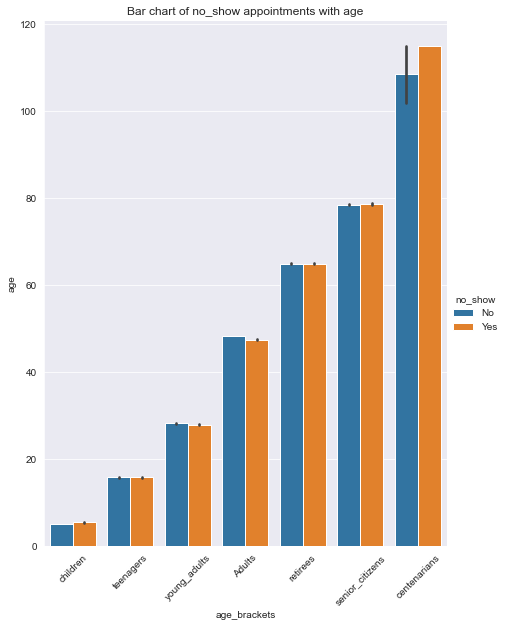

<Figure size 432x288 with 0 Axes>

In [30]:
# plot bar chart showing relationship between age brackets and no-show appointments
# ref [1](seaborn catplot)

g = sns.catplot(x='age_brackets', y='age', hue='no_show', data=df,\
            kind='bar', height=8, aspect=.8)
# setting title by calling a function
titles = ['Bar chart of no_show appointments with age']
for ax, title in zip(g.axes.flat, titles):
    ax.set_title(title)
    
# ref [2] (axes rotation, plot enlargement):


plt.xticks(rotation=45)
plt.show();
sns.despine()

<Figure size 432x288 with 0 Axes>

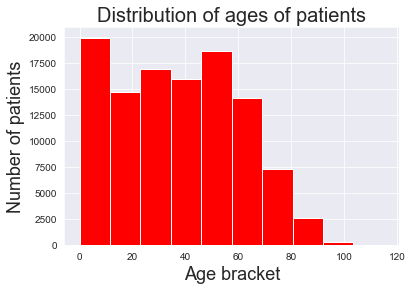

In [31]:
# Histogram showing distribution of ages of patients to verify  categories 

fig = plt.figure()

def plot_hist(ax):
    plt.hist(ax, color = 'r')
    plt.title('Distribution of ages of patients', fontsize=20)
    plt.xlabel('Age bracket', fontsize=18)
    plt.ylabel('Number of patients', fontsize=18)
plt.show();
# ref [3] (scripting your analysis): write a recallable function to plot histogram 
if __name__ == '__main__':
    above = df['age']
    plot_hist(above)

> Summary:
>
>It can be seen that centinarians-all females, have a little less than half their number not keeping with appointments. This may be attributed to frailty as shown in the bar chart below with the highest bar saying yes to the No-show question with increasing with age. Within the centinarian category, younger centinarians are prone to show up and are represented by the blue bar of that category. From the histogram plot, children are most likely to keep up with appointments. Young adults are likely too but lesser to children by a margin. Centinarians are least likely to show up. Limitation to this data is the size of these categories (there are only seven centinarians compared to more than 12000 children!)

### Research Question 2  ( Does gender predict no-show behavior of patients in total and within age brackets)

In [32]:
# use the groupby method to relate gender distribution within age brackets to no_show
age_gender = df.groupby(['no_show', 'age_brackets', 'gender']).size()
age_gender

no_show  age_brackets     gender
No       children         F          5681
                          M          6380
         teenagers        F          6206
                          M          3585
         young_adults     F         11757
                          M          4394
         Adults           F         21001
                          M          9547
         retirees         F          6354
                          M          3187
         senior_citizens  F          4840
                          M          2371
         centenarians     F             4
                          M             0
Yes      children         F          1462
                          M          1687
         teenagers        F          2071
                          M          1237
         young_adults     F          3676
                          M          1328
         Adults           F          4990
                          M          2223
         retirees         F          1166
 

In [33]:
# use the groupby method to relate total gender distribution to no_show
df.groupby(['no_show','gender']).size()

no_show  gender
No       F         57245
         M         30962
Yes      F         14594
         M          7725
dtype: int64

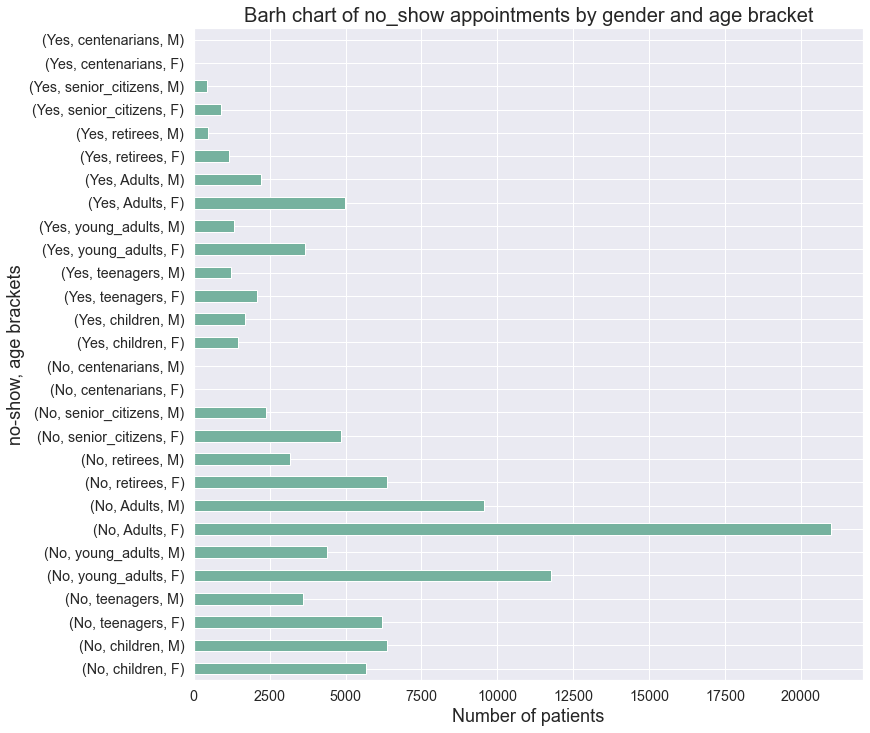

In [34]:
# plot barh showing gender distribution within age brackets and their no-show responses
sns.set(rc={'figure.figsize':(12,12)}, font_scale=1.3)
sns.set_palette("Set2", 20, .65)

ax = age_gender.plot(kind = 'barh');

# setting of axes labels, legend and title
ax.set_title('Barh chart of no_show appointments by gender and age bracket', fontsize=20)
ax.set_xlabel('Number of patients', fontsize=18)
ax.set_ylabel('no-show, age brackets', fontsize=18)
plt.show()

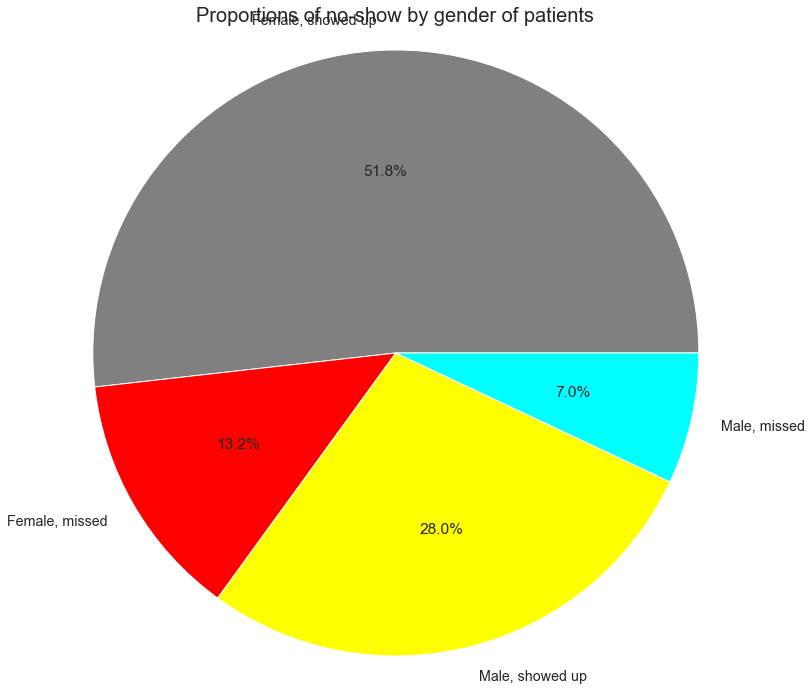

In [35]:
# use pie chart to show gender influence on no-show tendency regardless of age bracket
# create edges from gender groupby above, colours and labels for pie chart

labels = 'Female, showed up', 'Female, missed', 'Male, showed up', 'Male, missed'
edges = [57245, 14594, 30962, 7725 ]
colors = ['grey', 'red', 'yellow', 'cyan']
fig1, ax = plt.subplots()
ax.pie(edges, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Proportions of no-show by gender of patients', fontsize= 20)

# draw pie as a circle.
ax.axis('equal')
plt.show()

> Summary:
>
> Although the groupby method indicated that all age categories are likely to show up, the bar chart shows that age distribution within this bracket do not affect keeping up with appointments. However, the gender distribution within each age bracket and corresponding barh chart shows that females are more likely to show up or miss their appointments compared to males. Generally, Females of all age brackets are likely to be keep apointments as scheduled. This was evident from the female-show-up dominance of more than half the pie chart that included males and their no-show tendencies. The limitation to this deduction is that their are no male centinarians patients documented hence, they can neither show up nor miss appointments!.

### Research Question  3 ( Does medical scholarship influence no-show behavior of patients )

In [36]:
# use groupby method to relate patient medical sponsporship to no_show
df.groupby(['no_show','scholarship']).size()

no_show  scholarship
No       0              79924
         1               8283
Yes      0              19741
         1               2578
dtype: int64

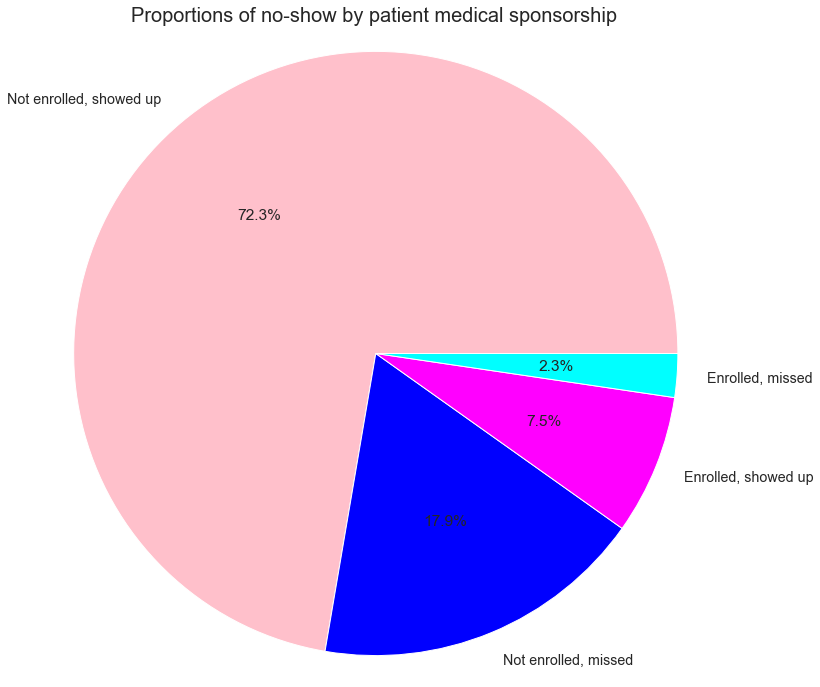

In [37]:
# use pie chart to show influence medical sponsporship on no-show tendency regardless of age bracket
# create edges from gender groupby above, colours and labels for pie chart

labels = 'Not enrolled, showed up', 'Not enrolled, missed', 'Enrolled, showed up', 'Enrolled, missed'
edges = [79924, 19741, 8283, 2578]
colors = ['pink', 'blue', 'magenta', 'cyan']
fig1, ax = plt.subplots()
ax.pie(edges, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Proportions of no-show by patient medical sponsorship', fontsize=20)

# draw pie as a circle.
ax.axis('equal')
plt.show()

> Summary:

> From this analysis, it can be seen that the portion of show ups for not enrolled patients is staggering and quite larger than all other portions combined. This has a lot to say about the aim and objectives of such medical sponsorship if it is meant to curb no-show behavior of patients. patients are more likely to miss their appointments if they are enrolled for sponsorship. sponsorship did not in any way remediated no-show behavior of patients. 

<a id='conclusions'></a>
## Conclusions

> This dataset is well structured and easy to manipulate. However, some constrains to the dataset include the minimal representation of some categories (there are only 7 centinarians compared to more than 12000 children!) to arrive at conclusions.Also, exaggeratons are likely should graphical presentation be relied on its entirety (there are no male centinarians patients documented hence, they can neither show up nor miss appointments thereby, yielding a false zero for males). Rather, textual results should be used together with these graphics. conclusively, being female and younger in age indicates a strong likelyhood to keeping with schedules. However, not getting a medical sponsorship seemed to make patients take their medical appointments seriouslly too.


Limitaions encountered in the process of
analysing the dataset

> An hindrance encountered working on the dataset was unpythonic column headings (indescriminate mixing of upper and lower cases, clumsy wordings and use of dash to seperate words). Prior to cleaning, columns were difficult to call out in many cases and unfruitful for computing results. Another like it were impractical data associated with age that had to be dropped to make realistic judgements. These limitations had the capability of grounding analysis and promoting false representations. Nevertheless, they were addressed through data cleaning for better data analysis.

References

    [1]   (seaborn catplot): https://www.statology.org/seaborn-title/
    [2]   (axes rotation, plot enlargement):
     https://www.delftstack.com/howto/seaborn/rotate-tick-labels-seaborn/#:~:text=Use%20the%20set_xticklabels%28%29%20Function%20to%20Rotate%20Labels%20on,labels%20and%20rotates%20them%20using%20the%20rotation%20parameter.
    [3]    (scripting your analysis) lesson 6(no 3): https://classroom.udacity.com/nanodegrees/nd002-alg-t2/parts/cd0000/modules/306f0239-bb80-45c6-bf45-37ee745a63d6/lessons/ls2228/concepts/a7c1d9bb-4f0f-4ca3-9daf-8ba5e8bb4970